In [1]:
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#dobra praksa:

plt.rcParams['figure.dpi'] = 140
# dpi ako stavimo na 140, onda je figsize settan na 1400x700

In [55]:
df = pd.read_csv("netflix_titles.csv")

In [56]:
df.head()
# 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [58]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### zadatak:
- za svaki od stupaca koji imaju prazne vrijednosti ispisati tocnu brojku takvih vrijednosti te koliki je njihov postotak

In [59]:
df.rating.isnull().sum()

7

In [60]:
df.rating.count()

7780

In [61]:
df["show_id"]

0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
7782    s7783
7783    s7784
7784    s7785
7785    s7786
7786    s7787
Name: show_id, Length: 7787, dtype: object

In [62]:
def print_empty_columns():
    for column in df.columns:
        null_count = df[column].isnull().sum() / len(df) * 100
        
        if null_count:
            print(f"{column} has {round(null_count, 2)} % of empty values.")
            
print_empty_columns()

director has 30.68 % of empty values.
cast has 9.22 % of empty values.
country has 6.51 % of empty values.
date_added has 0.13 % of empty values.
rating has 0.09 % of empty values.


# zadatak:
ove prazne vrijednosti zelimo urediti na sljedeci nacin:
    - za director postaviti no data
    - za cast postaviti no data
    - za country postaviti drzavu u kojoj je snimljeno najvise filmova
    - retke s praznim date_added i rating stupcem izbacujemo iz dataframe-a

## director

In [63]:


df["director"] = df["director"].fillna("No Data")

In [64]:
print_empty_columns()

cast has 9.22 % of empty values.
country has 6.51 % of empty values.
date_added has 0.13 % of empty values.
rating has 0.09 % of empty values.


## cast

In [65]:


df["cast"] = df["cast"].fillna("No Data")

In [66]:
print_empty_columns()

country has 6.51 % of empty values.
date_added has 0.13 % of empty values.
rating has 0.09 % of empty values.


## country

In [67]:

df.country.value_counts(ascending=False).index[0]

'United States'

In [68]:
df.country.value_counts(ascending=False).idxmax()

'United States'

In [69]:
df.country.mode()

0    United States
Name: country, dtype: object

In [70]:
df.country.mode()[0]

'United States'

In [71]:
most_often_country = df.country.mode()[0]

In [72]:
df.country = df.country.fillna(most_often_country)

## rating i date added

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [74]:
df = df.dropna()

In [75]:
print_empty_columns()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


## Rjesavanje duplikata

In [77]:
my_df = pd.DataFrame(
    {
        "first_name": ["John", "Jack", "John", "John", "Joe"],
        "last_name": ["Doe", "Biden", "Doe", "Daniels", "Nicholson"],
        "favourite_animal": ["dog", "dog", "dog", "bird", "lion"]
    }
)

my_df

,first_name,last_name,favourite_animal
0,John,Doe,dog
1,Jack,Biden,dog
2,John,Doe,dog
3,John,Daniels,bird
4,Joe,Nicholson,lion


In [78]:
my_df.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [79]:
my_df[my_df.duplicated()]

,first_name,last_name,favourite_animal
2,John,Doe,dog


In [80]:
my_df = my_df.drop_duplicates()

In [81]:
my_df.duplicated(subset=["first_name"])

0    False
1    False
3     True
4    False
dtype: bool

In [82]:
df.duplicated().sum()

0

In [83]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


In [85]:
df = df.drop_duplicates()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


### dodatno sredjivanje datuma

date_added je object, pretvoriti ga u datetime:

nakon sto dobijemo datetime:
 - u stupac month_added izdvojiti broj mjeseca (int)
 - u stupac month_name_added izdvojiti naziv mjeseca (string)
 - u stupac year_added izdvojiti godinu (int)

In [87]:
df.date_added = pd.to_datetime(df.date_added)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.1+ KB


In [89]:
df["month_added"] = df["date_added"].dt.month

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  month_added   7770 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 849.8+ KB


In [91]:
df["month_name"] = df["date_added"].dt.month

In [92]:
df["month_name_added"] = df["date_added"].dt.month_name

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           7770 non-null   object        
 1   type              7770 non-null   object        
 2   title             7770 non-null   object        
 3   director          7770 non-null   object        
 4   cast              7770 non-null   object        
 5   country           7770 non-null   object        
 6   date_added        7770 non-null   datetime64[ns]
 7   release_year      7770 non-null   int64         
 8   rating            7770 non-null   object        
 9   duration          7770 non-null   object        
 10  listed_in         7770 non-null   object        
 11  description       7770 non-null   object        
 12  month_added       7770 non-null   int64         
 13  month_name        7770 non-null   int64         
 14  month_name_added  7770 n

In [157]:
df["year_added"] = df["date_added"].dt.year

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           7770 non-null   object        
 1   type              7770 non-null   object        
 2   title             7770 non-null   object        
 3   director          7770 non-null   object        
 4   cast              7770 non-null   object        
 5   country           7770 non-null   object        
 6   date_added        7770 non-null   datetime64[ns]
 7   release_year      7770 non-null   int64         
 8   rating            7770 non-null   object        
 9   duration          7770 non-null   object        
 10  listed_in         7770 non-null   object        
 11  description       7770 non-null   object        
 12  month_added       7770 non-null   int64         
 13  month_name        7770 non-null   int64         
 14  month_name_added  7770 n

### dodatno sredjivanje datuma

In [159]:
df.country.tail(10)

7777                                        United States
7778                                        United States
7779                                               Mexico
7780                                                India
7781                                        United States
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                        United States
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, dtype: object

In [160]:
del df["first_country"]

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           7770 non-null   object        
 1   type              7770 non-null   object        
 2   title             7770 non-null   object        
 3   director          7770 non-null   object        
 4   cast              7770 non-null   object        
 5   country           7770 non-null   object        
 6   date_added        7770 non-null   datetime64[ns]
 7   release_year      7770 non-null   int64         
 8   rating            7770 non-null   object        
 9   duration          7770 non-null   object        
 10  listed_in         7770 non-null   object        
 11  description       7770 non-null   object        
 12  month_added       7770 non-null   int64         
 13  month_name        7770 non-null   int64         
 14  month_name_added  7770 n

In [162]:
df.loc[7786, "country"]

'United Kingdom, Canada, United States'

In [163]:
df["first_country"] = df["country"].str.split(",", expand=True)[0]
# 0 se odnosi na naziv stupca kojeg je pandas dodijelio 
# , a ne na index 0

In [164]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name,month_name_added,year_added,first_country
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,8,<bound method PandasDelegate._add_delegate_acc...,2020,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,12,<bound method PandasDelegate._add_delegate_acc...,2016,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,12,<bound method PandasDelegate._add_delegate_acc...,2018,Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,11,<bound method PandasDelegate._add_delegate_acc...,2017,United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,<bound method PandasDelegate._add_delegate_acc...,2020,United States


# VIZUALIZACIJA



### tweakanje vizalnih elemenata

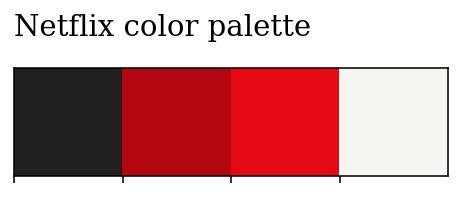

In [165]:
crna = "#221f1f"
tamno_crvena = "#b20710"
crvena = "#e50914"
bijela = "#f5f5f1"

sns.palplot([crna, tamno_crvena, crvena, bijela])

plt.title("Netflix color palette", fontfamily="serif", fontsize=15, loc="left",
         y=1.2)
plt.show()


In [166]:
# myplotlib.py


plot = """
1
I
I
I
I
I
+----------"""


figures = []


def scatter(X, Y)
    # nekako dodaj koortinate na graf
    graf = "nesto"
    figures.append(graf)

    
def show():
    for fig in figures:
        print()
            
import myplotlib as mlt
mlt.scatter([2, 3, 4, 5], [2, 3, 4, 5])
mlt.show()

SyntaxError: invalid syntax (3064772387.py, line 17)

### analiza po tipu sadrzaja

In [167]:
df["type"].unique()

array(['TV Show', 'Movie'], dtype=object)

### na netflixu imamo 2 tipa sadrzaja: filmove i serije
.
- analizirati koliki je postotak filmova i serija te graficki prikazati na grafu po zelji

In [168]:
ukupan_broj = df.groupby(["type"])["type"].count()

In [169]:
ukupno_redaka = len(df)

In [170]:
# (ukupan_broj / ukupno_redaka).round(2)
postotci = round(ukupan_broj / ukupno_redaka, 2)

In [171]:
postotci

type
Movie      0.69
TV Show    0.31
Name: type, dtype: float64

In [172]:
postotci.index

Index(['Movie', 'TV Show'], dtype='object', name='type')

In [173]:
postotci.values

array([0.69, 0.31])

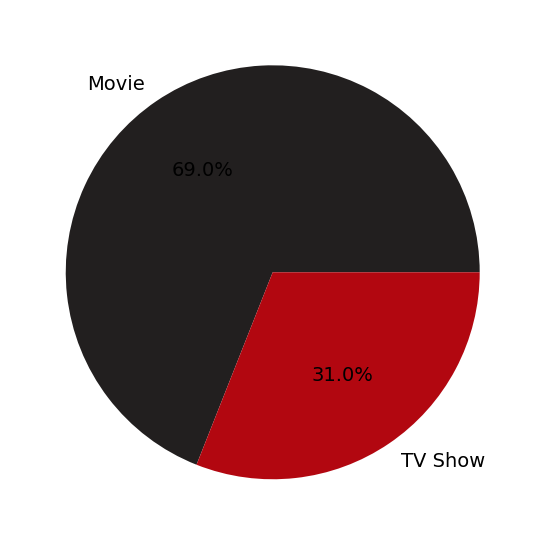

In [174]:
fig, ax = plt.subplots()
ax.pie(postotci.values, labels=postotci.index, autopct='%1.1f%%', colors=[crna, tamno_crvena, crvena, bijela])
plt.show()

In [175]:
postotak_filmova = postotci["Movie"]
postotak_serija = postotci["TV Show"]
print(postotak_filmova)
print(postotak_serija)

0.69
0.31


In [176]:
kina = pd.DataFrame(
    {
        "lokacija": ["Zagreb", "Osijek", "Split", "Rijeka"],
        "prihod": [80, 74, 83, 77]
    }
)
kina

,lokacija,prihod
0,Zagreb,80
1,Osijek,74
2,Split,83
3,Rijeka,77


<BarContainer object of 4 artists>

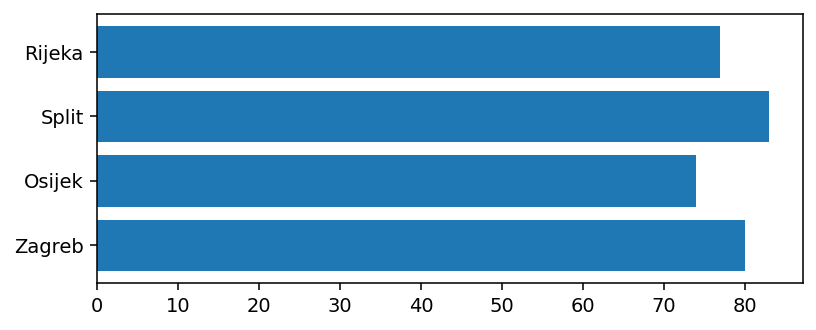

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))
plt.barh(kina.lokacija, kina.prihod)

In [178]:
omjeri_novi = pd.DataFrame(postotci).transpose()
postotak_filmova = omjeri_novi["Movie"][0]
postotak_filmova

0.69

<BarContainer object of 1 artists>

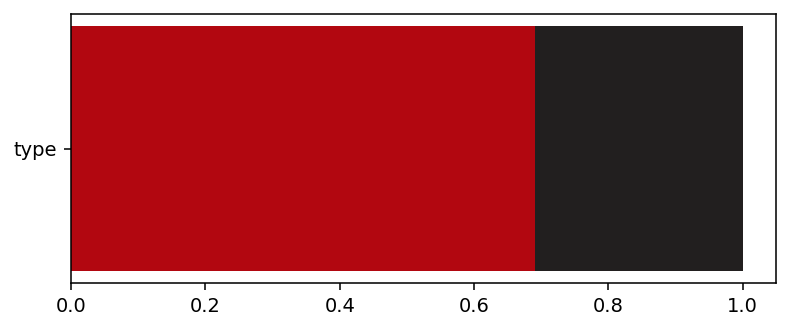

In [179]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))
# kreiramo okvir i jedan graf u njemu, figzise odredjuje

plt.barh(omjeri_novi.index, postotak_filmova, color=tamno_crvena)
plt.barh(omjeri_novi.index, postotak_serija, left=postotak_filmova, color=crna)

### ANALIZA PO DRZAVAMA

In [185]:
top_countries = df["first_country"].value_counts().head(10)

In [186]:
top_countries

United States     3379
India              956
United Kingdom     576
Canada             259
Japan              235
France             196
South Korea        194
Spain              168
Mexico             123
Australia          106
Name: first_country, dtype: int64

<BarContainer object of 10 artists>

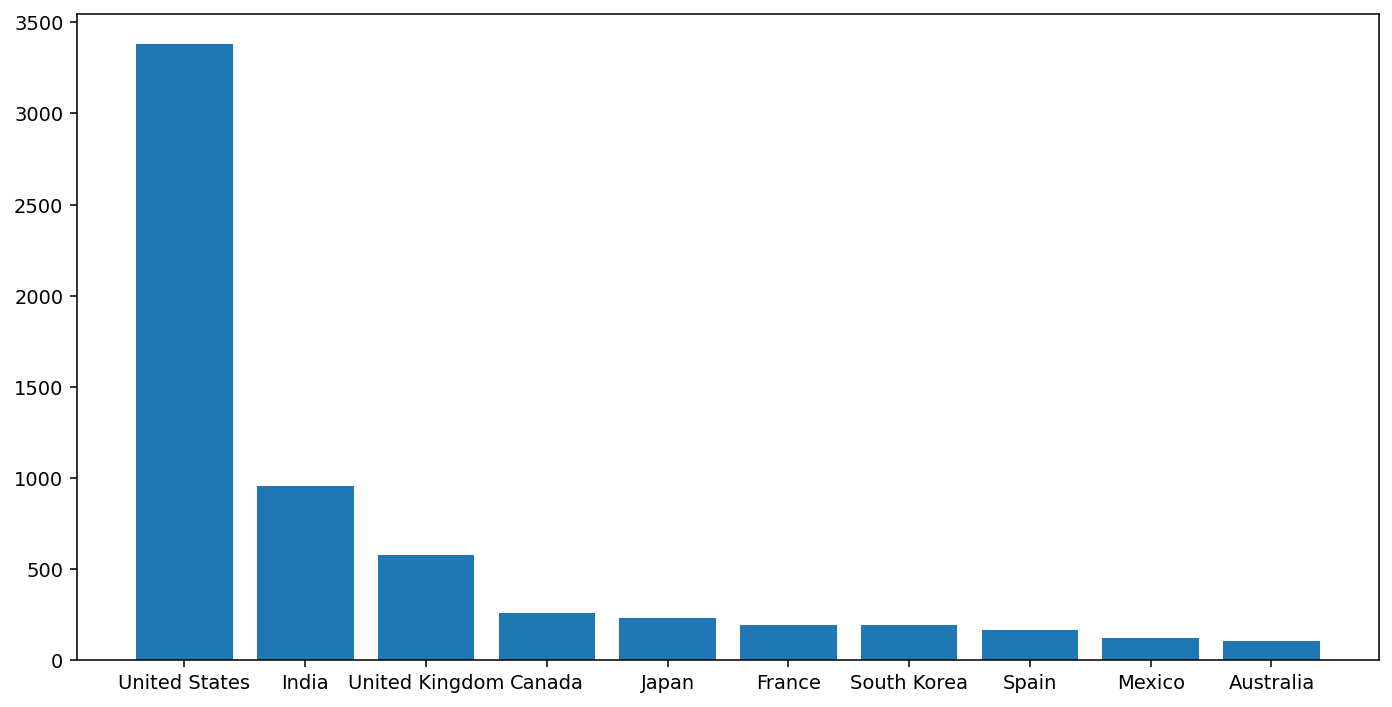

In [192]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(top_countries.index, top_countries)

In [193]:
top_countries

United States     3379
India              956
United Kingdom     576
Canada             259
Japan              235
France             196
South Korea        194
Spain              168
Mexico             123
Australia          106
Name: first_country, dtype: int64

In [204]:
type_by_country = df.groupby("first_country")["type"].value_counts().unstack()
type_by_country

type,Movie,TV Show
first_country,,
Argentina,50.0,18.0
Australia,56.0,50.0
Austria,7.0,1.0
Bangladesh,2.0,NaN
Belarus,NaN,1.0
...,...,...
Uruguay,8.0,1.0
Venezuela,2.0,NaN
Vietnam,5.0,NaN


### DODAVANJE SADRZAJA KROZ GODINE

Analizirati tempo dodavanja sadrzaja na netflix kroz godine (po tipu).

zanima nas koliko se u svakoj od godina za koju imamo dodalo filmova i serija